# 22-1.들어가며

## 학습 목표
---
- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

## 목차
---

1. 들어가며
2. Regularization과 Normalization
3. L1 Regularization
4. L2 Regularization
5. Extra : Lp norm
6. Dropout
7. Batch Normalization


# 22-2. Regularization과 Normalization

## Regularization? Normalization?
---
Regularization과 Normalization 이 두 개념은 서로 헷갈리는 경우가 많은 것 같습니다. 한국어로 번역할 때 두 개념이 다 '정규화'로 번역될 때가 많아서 더욱 혼란스러울 때가 많습니다. 우선 두 개념을 아래와 같이 정리해 보겠습니다.

**Regularization : 정칙화**라고 불리며, 오버피팅을 해결하기 위한 방법 중의 하나입니다. 오늘 우리가 가장 중요하게 다룰 주제이기도 하지요. **L1, L2 Regularization, Dropout, Batch normalization** 등이 있습니다. 이 방법들은 모두 오버피팅을 해결하고자 하는 방법 중에 하나입니다. 오버피팅은 한국어로 과적합이라고 하며, train set은 매우 잘 맞추지만, validation/test set은 맞추지 못하는 현상을 말합니다. 비유하자면 오버피팅은 기출문제는 외워서 잘 맞추지만 새로운 응용 문제로 시험을 볼 때는 잘 풀지 못하는 경우라고 할 수 있겠습니다. 더 좋은 결과를 얻기 위해서는 새로운 시험 즉, test set 에서도 잘 맞춰야겠죠? 그래서 사용하는 Regularization 기법들은 모델이 train set의 정답을 맞추지 못하도록 오버피팅을 방해(train loss가 증가) 하는 역할을 합니다. 그래서 train loss는 약간 증가하지만 결과적으로, validation loss나 최종적인 test loss를 감소시키려는 목적을 가지고 있지요.

**Normalization : 정규화**라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정입니다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당됩니다. 예를 들어, 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0~24) 의 값이 들어가는 경우, 학습 초반에는 데이터 거리 간의 측정이 피처 값의 범위 분포 특성에 의해 왜곡되어 학습에 방해를 받게 되는 문제가 있습니다. Normalization은 이를 모든 피처의 범위 분포를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정입니다.

이 두 가지 단어는 한국어로 번역 시에 혼용하여 쓰기도 하므로, 앞으로 이번 노드에서는 주로 영어로 표기하도록 하겠습니다. 핵심을 정리하면, Regularization은 오버피팅을 막고자 하는 방법, Normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정이라는 것입니다.

Regularization와 Normalization의 간단한 예제를 Iris dataset (https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) 의 회귀 문제를 풀면서 비교해보겠습니다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Iris data 중 virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y로 두고 print 해보겠습니다.

In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


값으로만 보니 직관적으로 잘 와닿지 않네요! 산점도로 그려봅시다.

아직 Normalization을 하지 않았기 때문에 x축과 y축은 각각의 최솟값과 최댓값의 범위로 그려집니다.

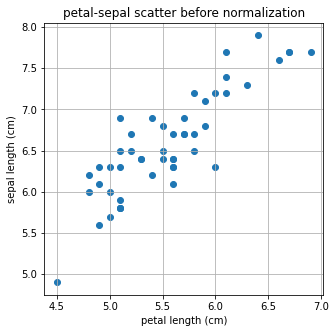

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

그래프의 축을 잘 살펴보세요!

이제 0-1로 normlization을 해주는 minmax_scale를 이용해서 산점도를 다시 한번 그려보겠습니다.

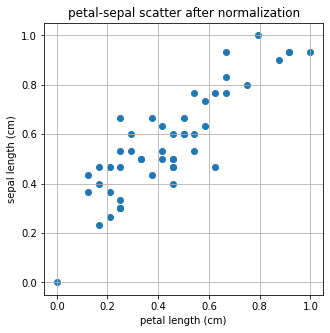

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

결과를 비교해보면, 가장 큰 값을 1, 가장 작은 값을 0으로 하여 축 범위가 바뀜을 확인할 수 있습니다. 데이터의 상대적인 분포는 바뀌지 않았지만, 피처의 스케일이 0과 1 사이로 변환되었으므로 이후 X, Y의 관계를 다루기 용이해졌습니다.

이번엔 같은 데이터로 간단한 회귀 문제를 풀면서 Regularization에 대해 알아보겠습니다.

sklearn.linear_model에 포함된 LinearRegression 모델을 사용하여 X-Y 관계를 선형으로 모델링 해 보겠습니다. 이 sklearn.linear_model에는 L1, L2 Regression인 Lasso와 Ridge 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해해 보겠습니다. 수학적 정의나 보다 구체적인 설명은 다음 스텝에 이어집니다.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


위에서 Linear regression 으로 구한 기울기와 절편을 가지고 일차함수를 만들어 산점도와 함께 그려보겠습니다.

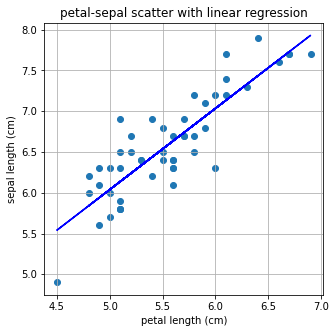

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번에는 L1, L2 Regularization으로 Regression을 해보겠습니다. 이는 Lasso, Ridge라고 부릅니다.

먼저 L1 regularization인 Lasso로 문제를 풀어보겠습니다.

기울기 : 0.00, 절편 : 6.59


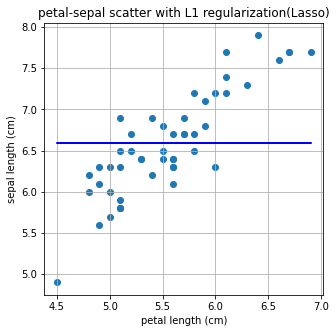

In [7]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

어떤가요? 혹시 기울기가 0으로 나오지 않았나요? Lasso 방법은 제대로 문제를 풀어내지 못하는 것 같습니다.

이제 같은 데이터셋으로 L2 regularization인 Ridge로 문제를 풀어보고 서로 비교해보겠습니다.

기울기 : 0.93, 절편 : 1.41


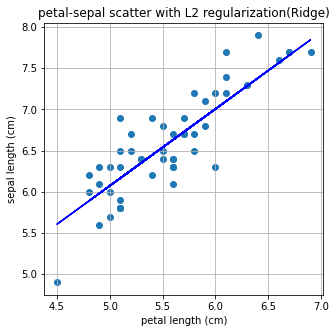

In [8]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

다시 다루겠지만, Linear Regression이 L2 Norm과 관련이 있습니다. 그래서 L2 Regularization을 쓰는 Ridge방법으로는 앞서 Linear Regression과 큰 차이가 없는 결과가 나옵니다.

그러나 왜 L1 Regularization을 쓰는 Lasso에서는 답이 나오지 않았을까요?

다음 스텝에서 그 이유를 알아보도록 하겠습니다!

# 22-3. L1 Regularization

저번 시간에 Regularization과 Normalization에 대한 정의에 대해 설명하고, L1/L2 Regularization을 코드로 맛보기 해보았습니다. 마지막에 같은 Linear Regression 문제를 푸는데 L1 Regularization에서는 문제가 풀리지 않음을 기억하시나요?

이번 시간에는 L1 Regularization에 대한 자세한 이해를 통해, 지난 스텝에서 Lasso로는 Regression 문제가 풀리지 않았던 이유를 알아보겠습니다. 그리고 어떤 때에 L1 Regularization을 사용하는지 알아보는 것이 목표입니다!

L1 regularization (Lasso)의 정의
---
L1 regularization은 아래와 같은 식으로 정의됩니다.
  
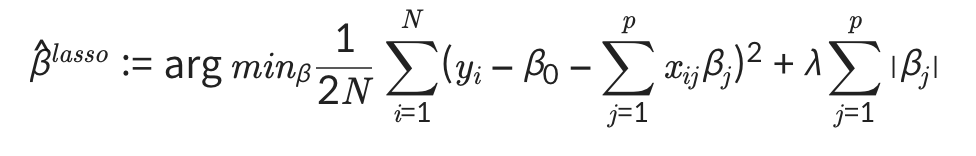

여기서 중요하게 봐야 할 부분은 λ 이후의 영역입니다. 이 부분이 없다면 Linear Regression과 동일합니다.

이 부분에서 L1 regularization 이 L1라는 이름이 붙은 이유가 나타나기도 하고, L2 regularization과의 차이를 나타내는 중요한 부분입니다.

💡참고 지식 (Lp norm)

norm은 벡터나 행렬, 함수 등의 거리를 나타내는 것으로 우리는 여기서 벡터값만 다룰 예정입니다. Lp norm 의 정의는 아래와 같습니다. (참고) Norm (mathematics (https://en.wikipedia.org/wiki/Norm_(mathematics)))

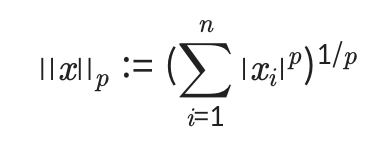

norm에 대해서는 이후 스텝에서 더 자세히 다룰 예정입니다!

그렇다면 p=1p=1인 경우의 L1 norm은 위의 식에서 1을 대입한 것으로 나타낼 수 있습니다.

이는 위에서 보인 λ 이후의 수식과 일치합니다!

때문에 p=1 이므로 L1 Regularization이라고 부르는 것입니다.

하지만 사이킷런이나 케라스, 텐서플로우 등의 패키지에서는 Lasso 라는 이름을 더 자주 사용합니다. 그럼 저번 시간에 사용해본 코드의 일부분을 살펴볼까요?

In [9]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


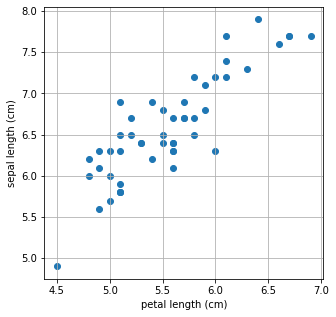

In [10]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


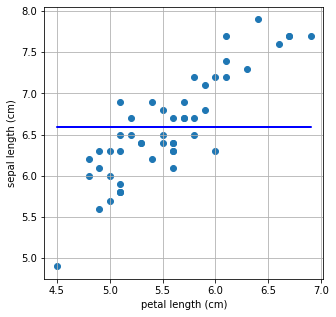

In [11]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이전 스텝에서 왜 L1 Regularization 만 답이 나오지 않았을까요?
---
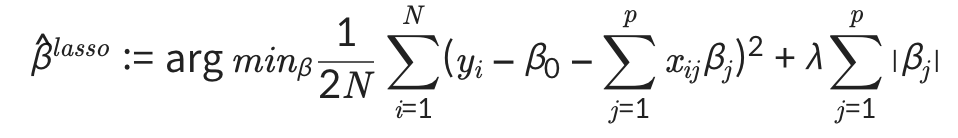

L1 Regularization의 정의는 위와 같습니다.

그러나 우리는 XX를 petal length, YY를 sepal length로 하여 N=50, p=1인 선형 회귀 방법을 풀었습니다. 식을 간단히 정리하면 아래와 같습니다. 여기서 β0 는 절편, β1 은 기울기를 말하는 것입니다.

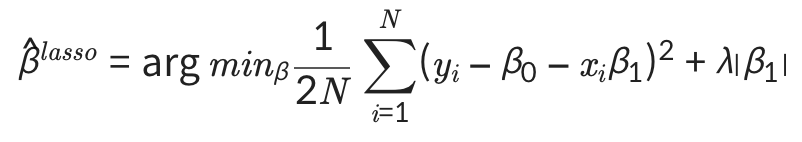

미분이 잘 기억날지 모르겠지만, 어떠한 값이 최대나 최소를 가지는 경우는 미분값이 0이 될 때입니다. 그러므로 이 식에서 β1 (기울기)에 대해 미분을 하게 되면,

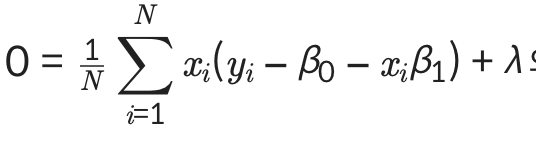

의 값만 남게 됩니다.

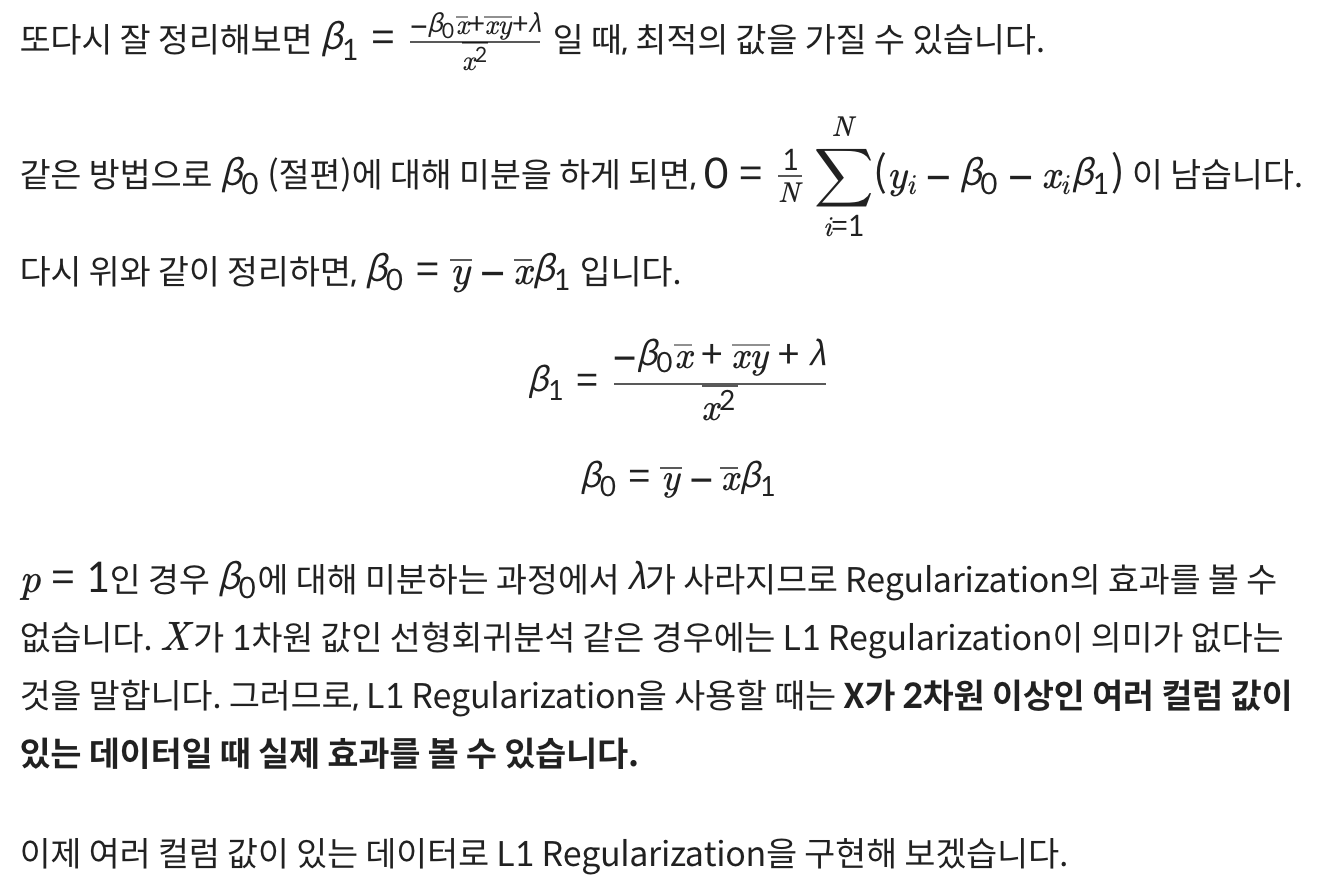

컬럼 수가 많은 데이터에서의 L1 regularization 비교
---
Iris 데이터는 특성이 총 4개로 컬럼 수가 너무 적으니 wine dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) 을 이용해 보겠습니다.
총 13개의 값을 갖는 데이터입니다.

In [13]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [14]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


먼저 Linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력해보겠습니다.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


이번에는 L1 regularization으로 문제를 풀어보겠습니다.

In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


결과 분석
---
coefficient 부분을 보시면 Linear Regression과 L1 Regularization의 차이가 좀 더 두드러짐을 알 수 있습니다.

Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다.

Error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다.

이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다.

다만 Linear Regression과 L1, L2 Regularization의 차이 중 하나는 α라는 하이퍼파라미터(수식에서는 λ)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.

# 22-4. L2 Regularization

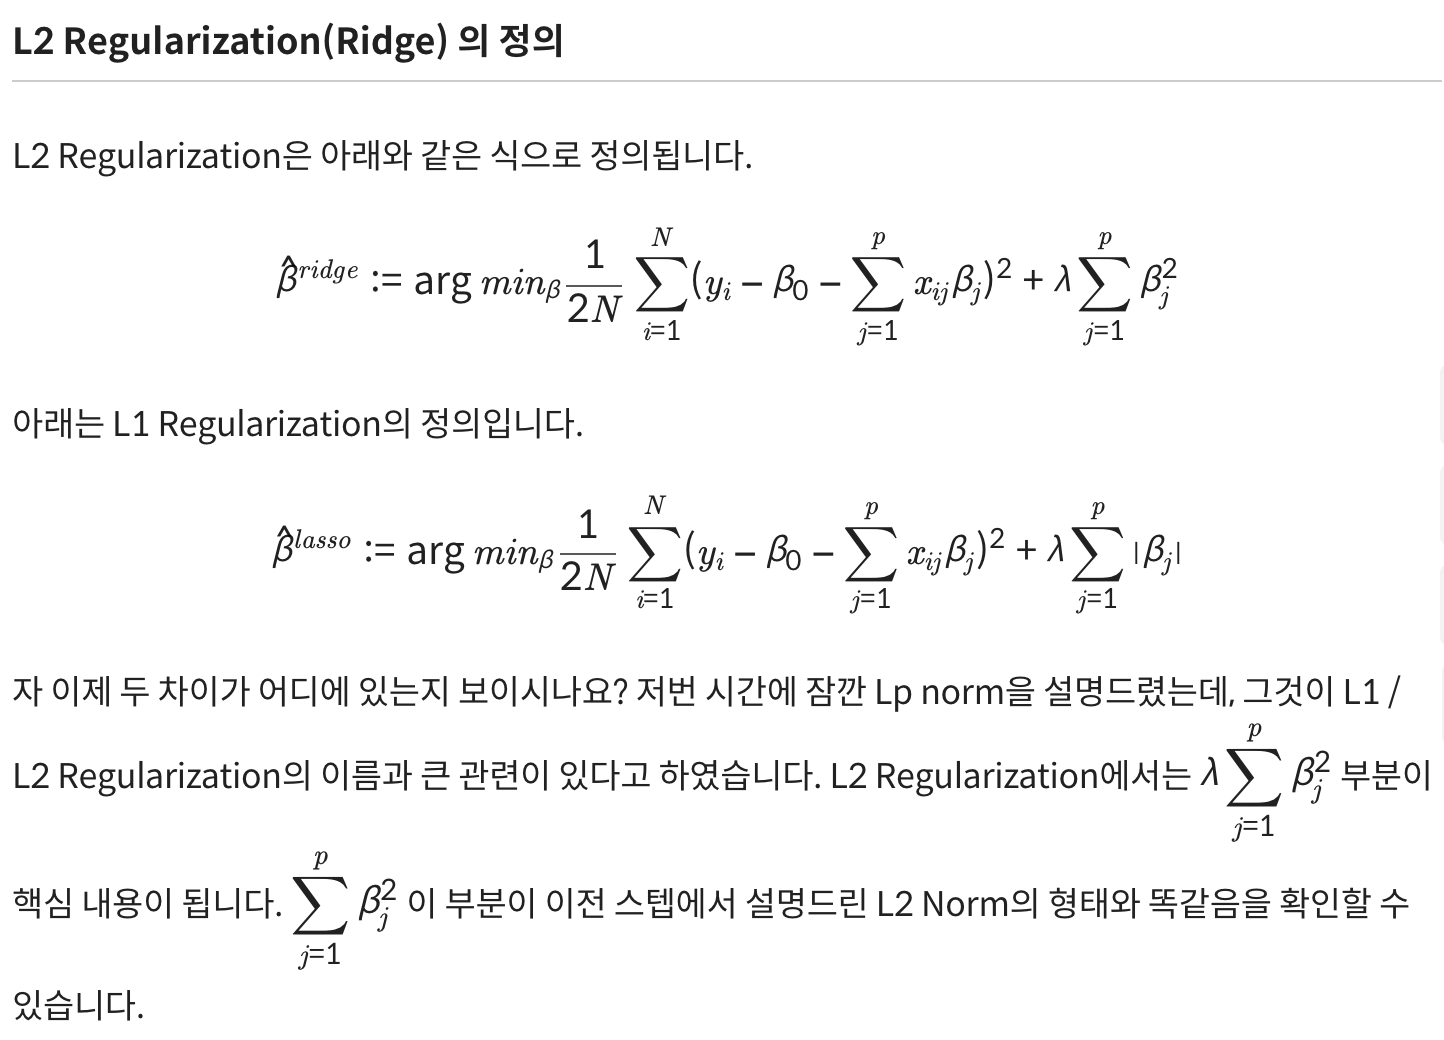

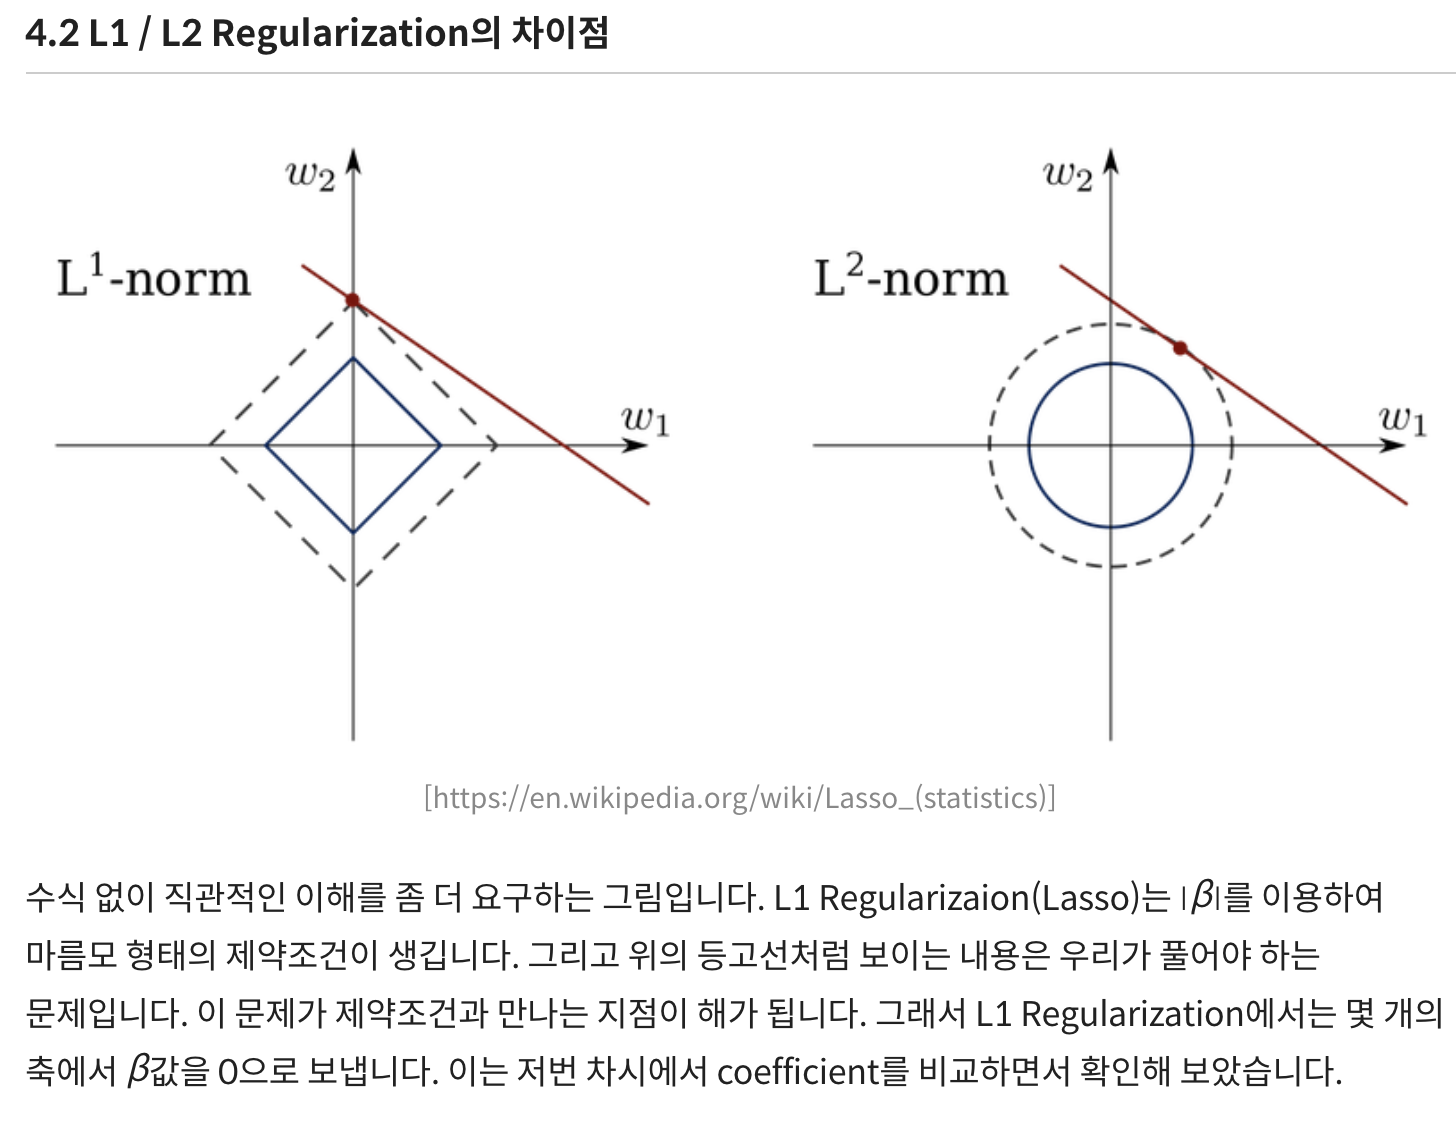

수식 없이 직관적인 이해를 좀 더 요구하는 그림입니다. L1 Regularizaion(Lasso)는 ∣β∣를 이용하여 마름모 형태의 제약조건이 생깁니다. 그리고 위의 등고선처럼 보이는 내용은 우리가 풀어야 하는 문제입니다. 이 문제가 제약조건과 만나는 지점이 해가 됩니다. 그래서 L1 Regularization에서는 몇 개의 축에서 β값을 0으로 보냅니다. 이는 저번 차시에서 coefficient를 비교하면서 확인해 보았습니다.

이와 다르게 L2 regularization은 β^2 이므로 원의 형태로 나타나게 됩니다. 그러므로 0에 가지는 않고 0에 가깝게 감을 확인할 수 있습니다. 또한 제곱이 들어가 있기 때문에 절댓값으로 L1 Norm을 쓰는 Lasso보다는 수렴이 빠르다는 장점이 있습니다. 이는 이전의 같은 문제에서 iteration을 제약조건으로 주며 실험해보겠습니다.

In [18]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [19]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.924145836492522, tolerance: 0.007479838709677421
  positive)


In [20]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.2511466959936429
Mean Squared Error: 0.10568076460795563
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


iteration 값을 5로만 설정해보아도, L2 Regularization의 문제는 Linear Regression과 같은 값이 나오지만, L1 Regularization에서는 앞 step과 같은 값을 확인할 수는 없었습니다. 심지어 수렴하지 않았다는 경고까지 나오는군요! 이는 아직 다른 조건들을 만족하는 답을 찾지 못하였다는 뜻입니다.

정리하면, L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 **차원 축소와 비슷한 역할**을 하는 것이 특징이며, L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 **수렴 속도가 빠르다**는 장점이 있습니다. 예를 들어, A=[1,1,1,1,1]A=[1,1,1,1,1] , B=[5,0,0,0,0]B=[5,0,0,0,0] 의 경우 L1-norm은 같지만, L2-norm은 같지 않습니다. 즉, 제곱 텀에서 결과에 큰 영향을 미치는 값은 더 크게, 결과에 영향이 적은 값들은 더 작게 보내면서 수렴 속도가 빨라지는 것입니다.

그러므로, 데이터에 따라 적절한 Regularization 방법을 활용하는 것이 좋습니다.

# 22-5. Extra : Lp norm

저번에도 잠깐 소개해드린 Lp norm에 대해 자세히 설명해드리려고 합니다.
Norm이라는 개념은 벡터뿐만 아니라 함수, 행렬에 대해서 크기를 구하는 것으로, 딥러닝을 배우는 과정에서는 주로 벡터, 좀 더 어렵게는 행렬의 Norm 정도만 알면 됩니다.

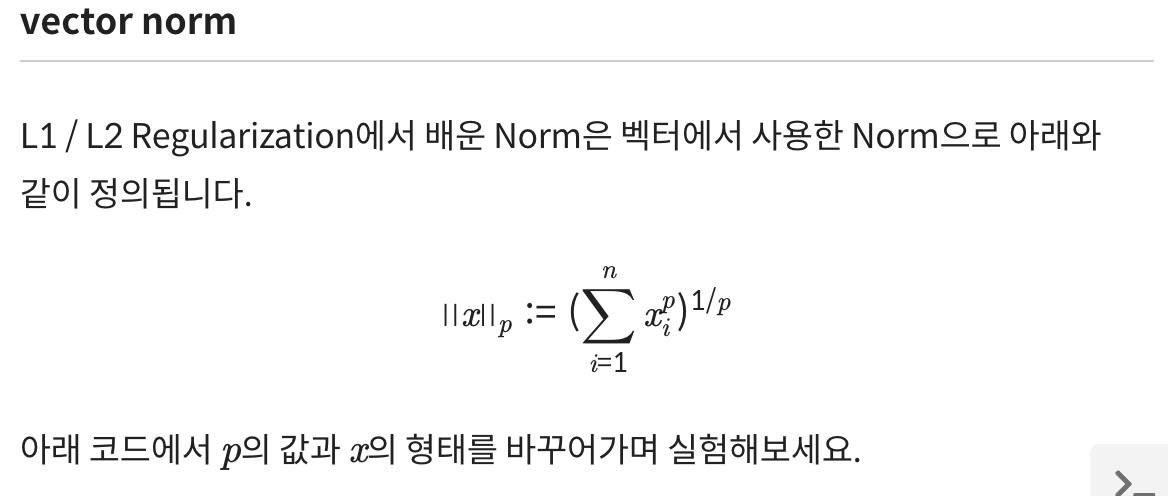

In [21]:
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


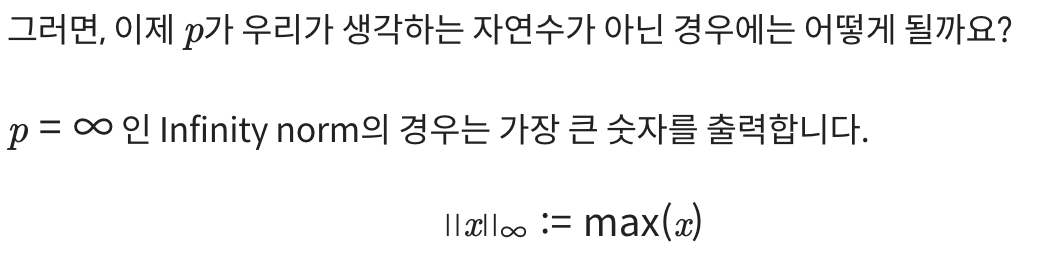

In [22]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


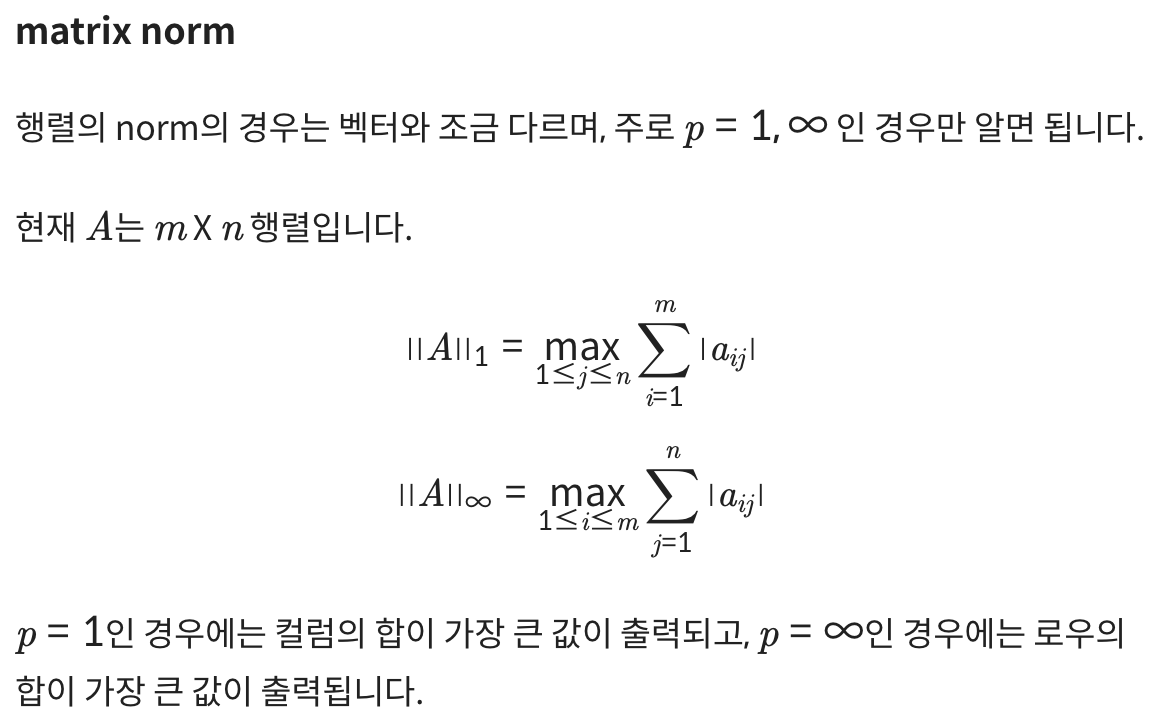

In [23]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


# 22-6. Dropout

드롭아웃(Dropout) 기법은 2014년도에 나온 논문입니다.

논문 제목 : Dropout: A Simple Way to Prevent Neural Networks from Overfitting
논문 발표 시점 : 2014년
논문 링크 : 논문 주소 (https://jmlr.org/papers/v15/srivastava14a.html)

드롭아웃 기법이 나오기 전의 신경망은 fully connected architecture로 모든 뉴런들이 연결되어 있었습니다. 그러나 드롭아웃이 나오면서 확률적으로 랜덤하게 몇 가지의 뉴럴만 선택하여 정보를 전달하는 과정입니다. 이름 그대로 몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌 확률적으로 버리면서 전달하는 기법입니다. 드롭아웃은 오버피팅을 막는 Regularization layer 중 하나입니다. 확률을 너무 높이면, 제대로 전달되지 않으므로 학습이 잘되지 않고, 확률을 너무 낮추는 경우는 fully connected layer와 같습니다. fully connected layer에서 오버피팅이 생기는 경우에 주로 Dropout layer를 추가합니다.

코드는 간단합니다. 논문이 나온 지도 오래되었기 때문에, 여러 프레임워크에서 간단하게 구현할 수 있도록 되어있습니다.

- Keras Dropout (https://keras.io/api/layers/regularization_layers/dropout/)

실습 (not overfitting)
---
fashion mnist (https://keras.io/api/datasets/fashion_mnist/)라는 데이터 셋을 불러와서 학습을 시키도록 하겠습니다. 총 10개의 클래스로 이루어져 있습니다. 이 데이터셋은 간단한 편이기도 하여 5 epoch에서도 어느 정도 결과가 나오게 되는데요. 드롭아웃 레이어를 중간에 추가하여 확률을 1에 가깝게 주면 어떻게 되는지 살펴보도록 하겠습니다.

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [31]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

dropout의 확률을 0.9로 주었을 때의 결과를 살펴보도록 하겠습니다.

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5852 - accuracy: 0.4020
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1348 - accuracy: 0.5464
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0726 - accuracy: 0.5686
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0454 - accuracy: 0.5777
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0233 - accuracy: 0.5839


dropout이 없을 때 실습을 해보면, 5 epoch 정도만 돌려도 충분히 높은 정확도를 볼 수 있습니다.

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6255 - accuracy: 0.7823
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3875 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3431 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8868
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8901


현재 이 데이터 셋은 학습이 잘 되는 데이터 셋으로, fully connected layer에서도 결과가 잘 나옴을 확인할 수 있는데요. 일부러 중간에 Dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인하였습니다. 다음은 overfitting이 나는 환경에서의 Dropout의 중요성을 알아보도록 하겠습니다.

실습 (overfitting)
---
overfitting이 되는지 확인해보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다. 우리는 위의 데이터를 이제 train:valid=99:1로 split 한 뒤에 loss function의 값을 그려보고, overfitting 이 나는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였습니다.

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.2045 - accuracy: 0.4667 - val_loss: 1.6531 - val_accuracy: 0.5883
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.5236 - accuracy: 0.5902 - val_loss: 1.1834 - val_accuracy: 0.6600
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1417 - accuracy: 0.6614 - val_loss: 0.9628 - val_accuracy: 0.7150
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9405 - accuracy: 0.7061 - val_loss: 0.8300 - val_accuracy: 0.7467
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8200 - accuracy: 0.7294 - val_loss: 0.7485 - val_accuracy: 0.7667
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7463 - accuracy: 0.7424 - val_loss: 0.6969 - val_accuracy: 0.7733
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.7499 - val_loss: 0.6599 - val_accuracy: 0.7833

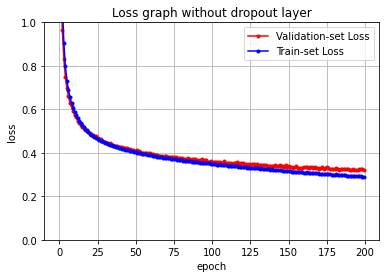

In [35]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

위의 droupout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌습니다. 그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.
이렇게 오버피팅을 만든 환경에서 Dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠습니다.

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.2130 - accuracy: 0.3895 - val_loss: 1.6991 - val_accuracy: 0.6350
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.5865 - accuracy: 0.5542 - val_loss: 1.2306 - val_accuracy: 0.6567
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.2251 - accuracy: 0.6067 - val_loss: 1.0172 - val_accuracy: 0.7183
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0382 - accuracy: 0.6573 - val_loss: 0.8824 - val_accuracy: 0.7500
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9221 - accuracy: 0.6885 - val_loss: 0.7961 - val_accuracy: 0.7583
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8444 - accuracy: 0.7071 - val_loss: 0.7436 - val_accuracy: 0.7683
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7985 - accuracy: 0.7180 - val_loss: 0.7039 - val_accuracy: 0.7683

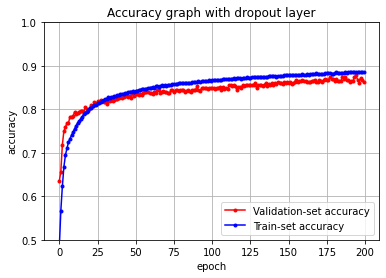

In [37]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만, Dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다. 사실 더 복잡한 네트워크나, 더 어려운 데이터의 경우에는 이러한 오버피팅이 더 자주 있는 일이므로, Dropout layer를 추가하는 경우가 많습니다. 하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일입니다.

# 22-7. Batch Normalization

Batch Normalization은 gradient vanishing, explode 문제를 해결하는 방법입니다.

논문 제목 : Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
논문 발표 시점 : 2015년
논문 링크 : 논문 PDF (https://arxiv.org/pdf/1502.03167.pdf)

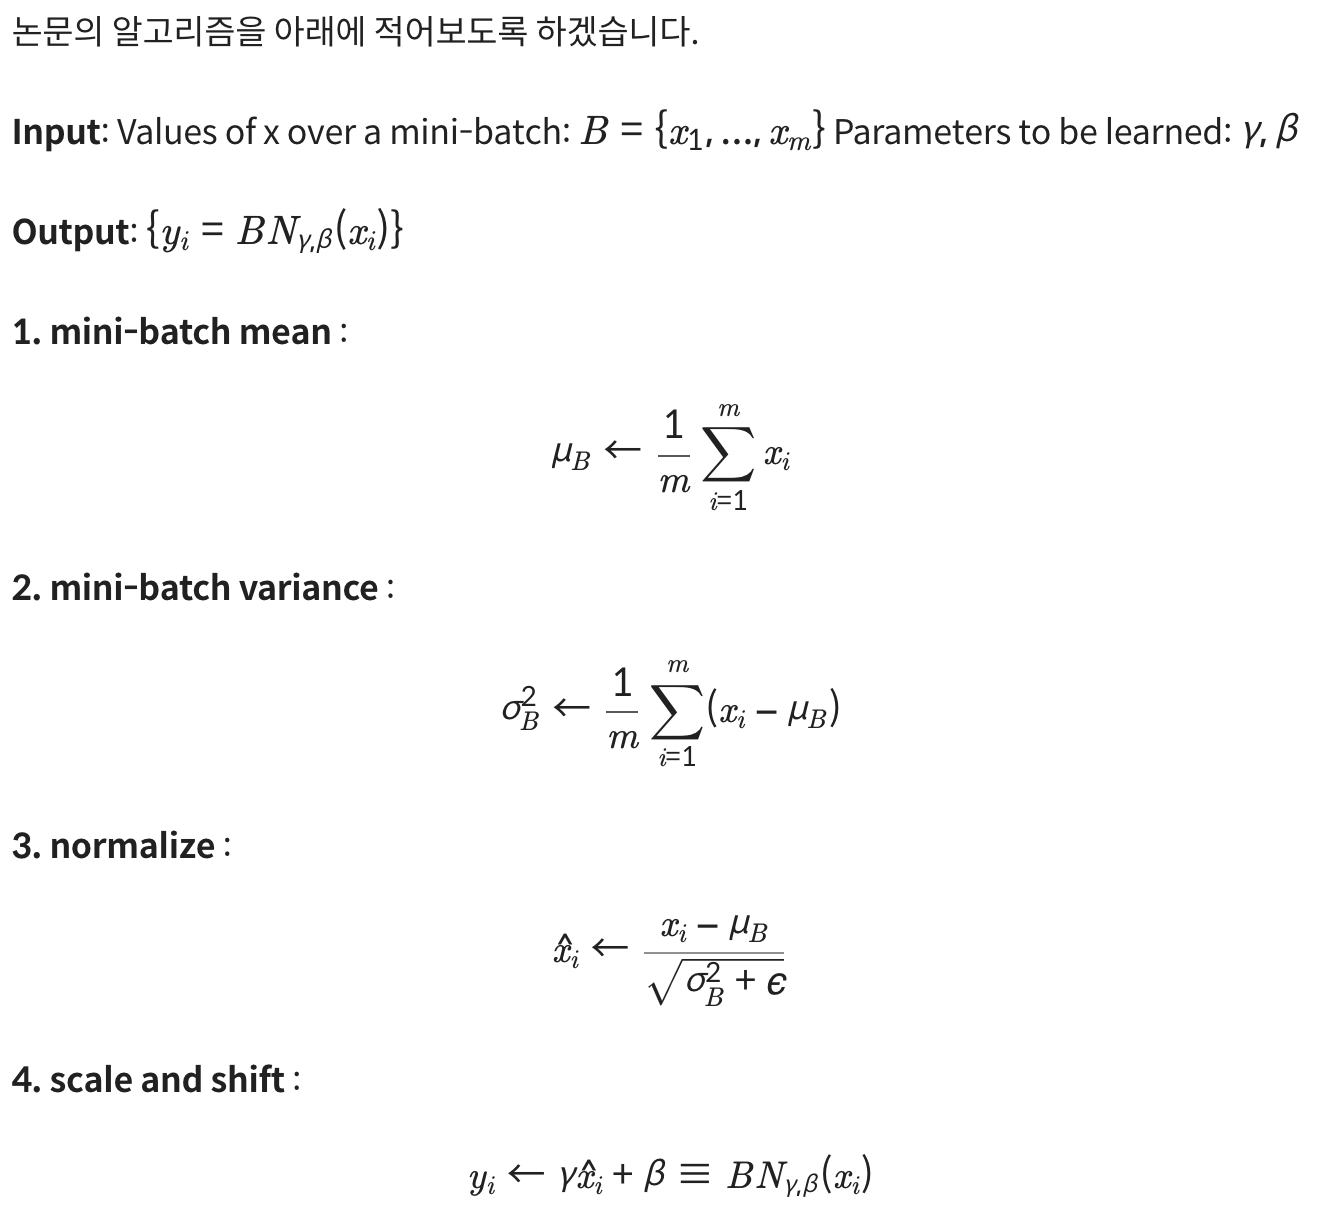

수식에서 중요한 부분은 normalize 부분에서 **분모에 ϵ이 추가**되었다는 점인데요. 이 부분으로 인해 normalize 과정에서 gradient가 사라지거나(vanishing), 폭등하는(explode) 것을 막을 수 있습니다. ϵ 부분만 제외하면, 기존의 z-score로 normalize하는 과정과 같지만, 이 부분을 추가하는 것만으로도 오버피팅이나 학습이 잘되지 않는 것을 막을 수 있게 됩니다.

실습
---
아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교하고자 합니다. 중점적으로 봐야 할 내용은 **정확도 비교와 속도의 차이**입니다.

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


이미지 데이터인 fashion mnist 데이터 셋을 불러오겠습니다. 총 10개의 클래스로 나누어져있습니다.

In [39]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

이미지를 트레이닝하기 위해서 train / valid 를 7:3으로 분리하고,
Dense layer 를 쌓아서 트레이닝해보겠습니다.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 17ms/step - loss: 1.6177 - accuracy: 0.4808 - val_loss: 0.7417 - val_accuracy: 0.7418
Epoch 2/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6883 - accuracy: 0.7647 - val_loss: 0.5988 - val_accuracy: 0.7989
Epoch 3/20
21/21 [==============================] - 0s 8ms/step - loss: 0.5719 - accuracy: 0.8101 - val_loss: 0.5357 - val_accuracy: 0.8219
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.5167 - accuracy: 0.8290 - val_loss: 0.5020 - val_accuracy: 0.8302
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4851 - accuracy: 0.8378 - val_loss: 0.4800 - val_accuracy: 0.8358
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4630 - accuracy: 0.8452 - val_loss: 0.4787 - val_accuracy: 0.8330
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4478 - accuracy: 0.8486 - val_loss: 0.4485 - val_accuracy: 0.8475
Epoch 8/20
21/21 [=

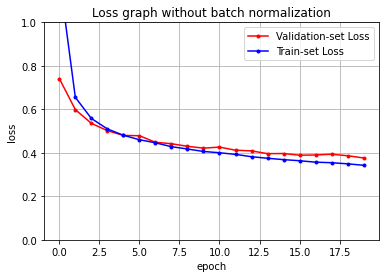

In [41]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

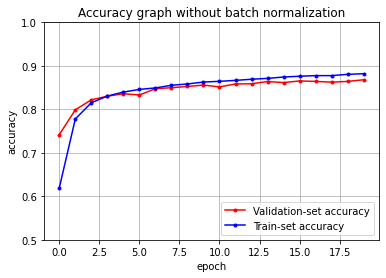

In [42]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

아래는 BatchNoramlization layer를 추가한 실습입니다.

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 26ms/step - loss: 1.3157 - accuracy: 0.5536 - val_loss: 1.1748 - val_accuracy: 0.5994
Epoch 2/20
21/21 [==============================] - 0s 12ms/step - loss: 0.5412 - accuracy: 0.8186 - val_loss: 0.8727 - val_accuracy: 0.7257
Epoch 3/20
21/21 [==============================] - 0s 12ms/step - loss: 0.4529 - accuracy: 0.8448 - val_loss: 0.7518 - val_accuracy: 0.7854
Epoch 4/20
21/21 [==============================] - 0s 12ms/step - loss: 0.4163 - accuracy: 0.8565 - val_loss: 0.6881 - val_accuracy: 0.8092
Epoch 5/20
21/21 [==============================] - 0s 13ms/step - loss: 0.3885 - accuracy: 0.8672 - val_loss: 0.6318 - val_accuracy: 0.8313
Epoch 6/20
21/21 [==============================] - 0s 11ms/step - loss: 0.3647 - accuracy: 0.8737 - val_loss: 0.5768 - val_accuracy: 0.8463
Epoch 7/20
21/21 [==============================] - 0s 12ms/step - loss: 0.3477 - accuracy: 0.8779 - val_loss: 0.5430 - val_accuracy: 0.8553
Epoch 8/20
21

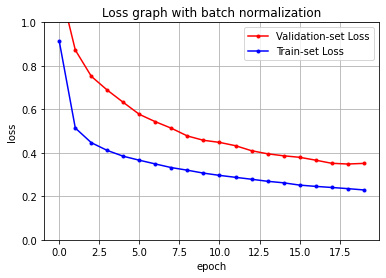

In [44]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

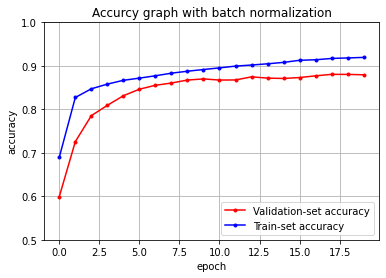

In [45]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

기존의 fully connected layer도 낮지 않은 결과를 가져오지만, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있습니다. 또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있었습니다. 즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 앞서 설명해 드린 ϵ 부분으로 인해 안정적인 학습이 가능해집니다.